# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives
Problem Statement
* There is a need to analyze visitors actions to understand the visitors' interest. The aim is to expand buisness by acquirng new subscribers. The team is interested in knowing if the new landing page is effective than theold page in gathering new subscribers for the news portal.

Objectives
* To find out if users spend more time on the new landing page than on the existing landing page
* To find out if the conversion rate (the proportion of users who visit the landing and get conerted) for the new page is greater than the conversion rate for the old page.
* To find out if the converted status depend on the preferred language
* To find out if the time spent on the new page is the same for the different language users.



## Import all the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind    #This will be used for conducting the hypothesis
import seaborn as sns
import numpy as np

Matplotlib is building the font cache; this may take a moment.


## Reading the Data into a DataFrame

In [2]:
df = pd.read_csv("abtest.csv")     #Load the data into the Notebook

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [3]:
df.head()  #The first few rows of the data

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail()    #The last few rows of the data

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
df.shape   #Check the shape of the data

(100, 6)

In [6]:
df.info()    #Get information about the data supplied.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [7]:
df.isnull().sum()   #Check for missing values

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [8]:
df.isnull().sum()/len(df)*100     #Find the proporion of the missing values

user_id                   0.0
group                     0.0
landing_page              0.0
time_spent_on_the_page    0.0
converted                 0.0
language_preferred        0.0
dtype: float64

In [9]:
df.duplicated()   #Check for duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83  

### Univariate Analysis

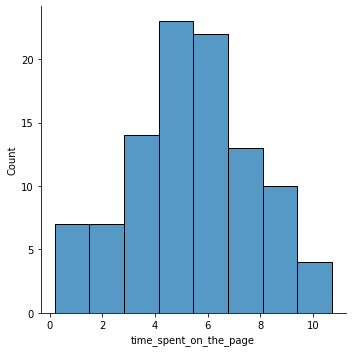

In [10]:
sns.displot(df["time_spent_on_the_page"]);

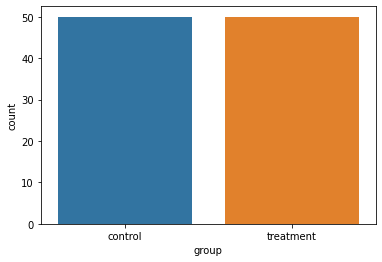

In [11]:
sns.countplot(x ="group",data=df);

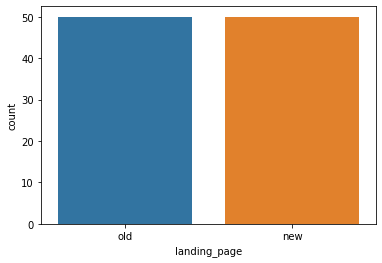

In [12]:
sns.countplot(x = "landing_page",data=df);

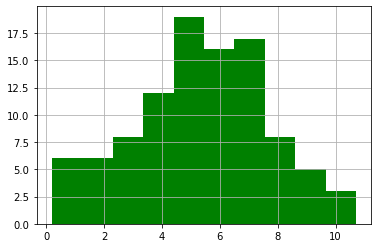

In [13]:
df["time_spent_on_the_page"].hist(color='g');

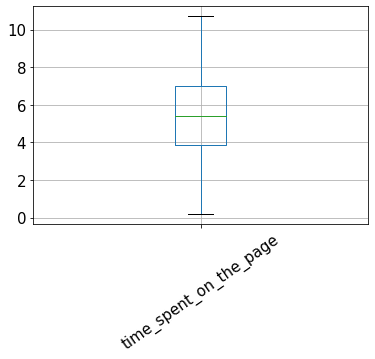

In [15]:
df.boxplot(column = ["time_spent_on_the_page"], rot =35, fontsize =15);

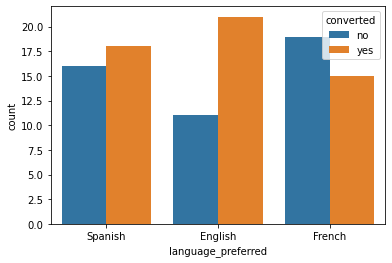

In [17]:
sns.countplot(x="language_preferred", hue ='converted',data=df);

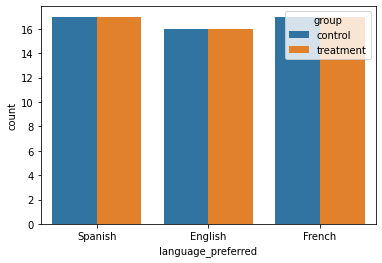

In [18]:
sns.countplot(x="language_preferred", hue ='group',data=df);

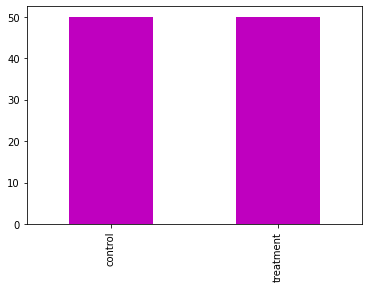

In [19]:
df["group"].value_counts().plot.bar(color ='m');

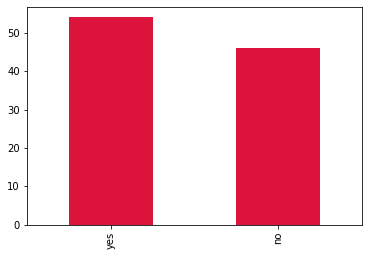

In [20]:
df["converted"].value_counts().plot.bar(color ='crimson');

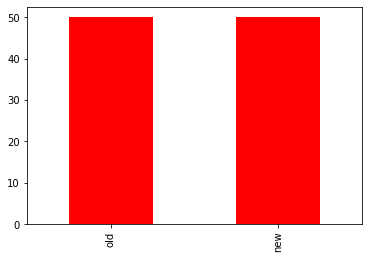

In [21]:
df["landing_page"].value_counts().plot.bar(color ='r');

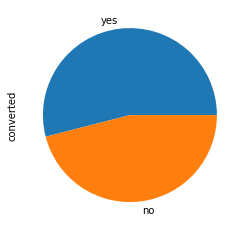

In [22]:
df["converted"].value_counts().plot(kind='pie');

### Bivariate Analysis

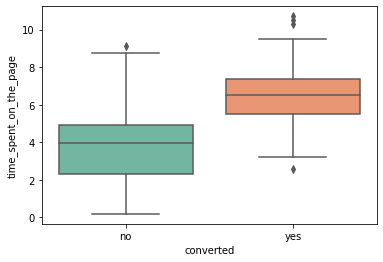

In [23]:
sns.boxplot(x= 'converted', y= 'time_spent_on_the_page', data = df, palette= 'Set2');

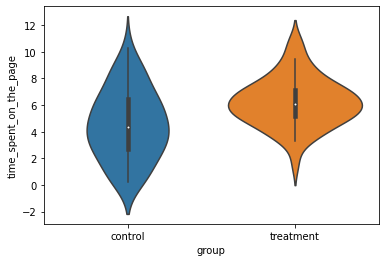

In [24]:
sns.violinplot(x= 'group', y= 'time_spent_on_the_page', data =df);

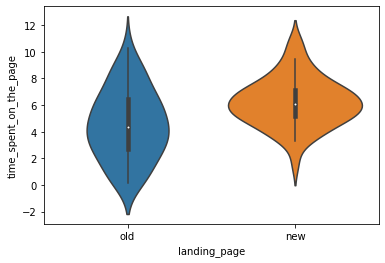

In [25]:
sns.violinplot(x= 'landing_page', y= 'time_spent_on_the_page', data =df);

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

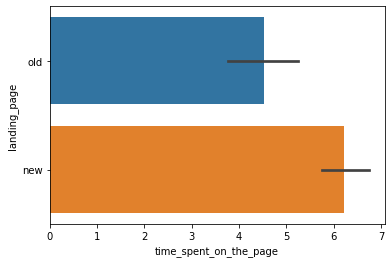

In [26]:
sns.barplot(x="time_spent_on_the_page",y="landing_page", data= df)
plt.show();

In [28]:
df.groupby('landing_page')['time_spent_on_the_page'].sum()  #Total time spent on each category of landing page

landing_page
new    311.16
old    226.62
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

H0: Users do not spend more time on the new landing page than the existing landing page.
H1: Users do spend more time on the new landing page than the existing landing page.

### Step 2: Select Appropriate test

The appropriate test to use for this hypothesis testing is the independent samples T-test.
This is made available by Scipy Python package, therefore, necessary modules will be imported from the Scipy package. 

### Step 3: Decide the significance level

Level of significance (α) = 0.05 0r 5%

### Step 4: Collect and prepare data

In [29]:
# The given data was split into time spent on the old landing page and the new landing page.
data1 = [3.48,3.02,5.28,6.53,2.08,6.21,2.58, 8.72, 0.4, 10.3, 3.88, 2.66, 7.03, 4.05, 4.28, 3.52, 5.39,4.52,4.46,8.5,3.13,6.04,0.19,8.46,1.92,8.02,0.22,4.71,0.93,1.81,7.4,9.15,4.18,5.47,5.96,6.6,4.75,2.23,0.4,4.87,6.57,1.44,3.21,2.9,4.3,0.91,6.04,8.35,3.05,6.52]
data2  = [7.13,4.4,4.75,5.25, 10.71,5.86,6.03,6.27,8.73, 3.65,7.02,6.18,4.39,9.49,7.81, 5.41, 1.65,7.16,7.16,3.91, 5.37,7.23,8.08,10.5,5.65,6.47,6.41,8.3,6.01,6.79,7.27,6.7,5.42,5.08,7.46,3.88,9.12,4.68,5.26,5.74,6.71,3.68,3.3,5.4,8.47,4.94,5.15,7.07,6.2,5.86]

### Step 5: Calculate the p-value

In [45]:
calc, p = ttest_ind(data1, data2)  # Finding the calculated value and the p-value
print('calc = %.2f, p= %.2f' % (calc,p))  # Print the output

calc = -3.79, p= 0.00


### Step 6: Compare the p-value with $\alpha$

In [33]:
#Comparing the p-value
if p> 0.05:
    print ('Users do not spend more time on the new landing page than the existing landing page.')
else:
    print('Users do spend more time on the new landing page than the existing landing page.')

Users do spend more time on the new landing page than the existing landing page.


### Step 7:  Draw inference

Since the p-value is less than the alpha value of 0.05, we rejected the null hypothesis, and therefore conclude that users spend more time on the new landing page than the existing landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [41]:
df.groupby(["landing_page","converted"]).size()

landing_page  converted
new           no           17
              yes          33
old           no           29
              yes          21
dtype: int64

In [42]:
# Calculate the conversion rate.
Conversion_rate_new_page = 33/50*100
Conversion_rate_old_page = 21/50*100

In [43]:
Conversion_rate_new_page    #Print the conversion rate for the new landing page.

66.0

In [44]:
Conversion_rate_old_page     #Print the conversion rate for the old landing page.

42.0

## 3. Is the conversion and preferred language are independent or related?

In [40]:
df.groupby(['converted','language_preferred']).size()

converted  language_preferred
no         English               11
           French                19
           Spanish               16
yes        English               21
           French                15
           Spanish               18
dtype: int64

## 4. Is the time spent on the new page same for the different language users?

In [36]:
df.groupby('language_preferred')['time_spent_on_the_page'].sum()

language_preferred
English    177.89
French     178.61
Spanish    181.28
Name: time_spent_on_the_page, dtype: float64

## Conclusion and Business Recommendations

Conclusion
* There is an absence of missing values in the data used for the study.
* There are no duplicate values in the data
* The time spent on the news portal followed a normal distribution.
* Using visual analysis, it was revealed that users spend more time on the new landing page than the old page.
* The new landing has attracted more subscribers than the old page.
* The conversion rate for the new page is greater than the conversion rate for the old page.
* Users who preferred English Language and Spanish Langauge are more likely to get converted than those who prefer French Language. What this implies is that the conversion and preferred langauge are related.
* The new landing page can therefore be regarded as an improvement over the old landing page.
Recommendations
* E-news should create more content in the languages that attract more users to the news portal.
* Since the new landing page is effective than the old page in gathering new subscribers for the news portal, E-news should adopt the new landing page for more engaging content.

___